# Applied Data Science Capstone

## Introduction

The problem that is going to be presented are the perks and benefits of living in two Croatian cities: Zagreb and Varaždin. We are going to look for answers to some of the following questions: which city is better suited for a young person in their 20's regarding the numbers of interesting venues in the city, like coffee shops, restaurants, movie theaters etc in the radius of 10 kilometers from the town, and which town is better suited for a family regarding the crime rate, monthly costs etc.

## Data

We are going to collect the data for the nearby venues from Foursquare to get the list of:
* coffee shops 
* bars
* pubs
* clubs
* restaurants
* theaters
* shopping centers

We are also going to collect some numerical data from www.numbeo.com about
* crime rate
* quality of life index
* average salary 
* cost of living 
* apartment price
* rent
* preschool price

in these two cities. 
We are going to examine which of the two cities has more interesting venues, and after that we are going to compare which of the two cities has the smaller crime rate, living costs, rent/apartment cost, but a higher salary and quality of life index.

## Methodology section

#### Import libraries

In [1]:
import requests 
import pandas as pd 
import numpy as np 

from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup
import bs4, re
from pandas.io.json import json_normalize

#### Foursquare credentials

In [2]:
CLIENT_ID = 'H1YI1IFUJP2TVASK1Q4DAIE5MJKQJOPK4HBYKQADZ0Y4WD5E' # your Foursquare ID
CLIENT_SECRET = 'Y0AZ1HS3USW5FHSB2T1SAYF2HGRWYQBWILOJA3YAM353LXIX' # your Foursquare Secret
ACCESS_TOKEN = '10PPE2HKPYK3USQHV2I14Q05S0ADKFY5JHTMTRH3JW24FI2F' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000

#### Instance geocoder for Varaždin

In [3]:
address = 'Varaždin'

geolocator = Nominatim(user_agent="vz_foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
radius = 10000
print(latitude, longitude)

46.3079645 16.3378198


In [4]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)

#### Get results

In [5]:
results = requests.get(url).json()

#### Transform response into a pandas dataframe

In [6]:
venues = results['response']['groups'][0]['items']
vz_dataframe = json_normalize(venues)
vz_dataframe.head()

<ipython-input-6-79fbf087b779>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  vz_dataframe = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.crossStreet,venue.venuePage.id
0,e-0-4bcc4fcc937ca59317d5aa92-0,0,"[{'summary': 'This spot is popular', 'type': '...",4bcc4fcc937ca59317d5aa92,Stari grad Varaždin,Ivana Kukuljevića,46.309535,16.333919,"[{'label': 'display', 'lat': 46.30953471054936...",347,...,HR,Varaždin,Varaždinska Županija,Hrvatska,"[Ivana Kukuljevića, 42000 Varaždin]","[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",0,[],NaN,NaN
1,e-0-5543b1f1498e1ce42c13dbf3-1,0,"[{'summary': 'This spot is popular', 'type': '...",5543b1f1498e1ce42c13dbf3,Medina škrinja,NaN,46.306738,16.338372,"[{'label': 'display', 'lat': 46.3067382516887,...",142,...,HR,NaN,NaN,Hrvatska,NaN,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN
2,e-0-4c3d7ba4b169c9b6d9184768-2,0,"[{'summary': 'This spot is popular', 'type': '...",4c3d7ba4b169c9b6d9184768,Caffe Bar Lavra,Gajeva 17,46.309645,16.337262,"[{'label': 'display', 'lat': 46.30964508206210...",191,...,HR,Varaždin,Varaždinska Županija,Hrvatska,"[Gajeva 17, 42000 Varaždin]","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],NaN,NaN
3,e-0-4c99d7b1553cef3bd8e9cf77-3,0,"[{'summary': 'This spot is popular', 'type': '...",4c99d7b1553cef3bd8e9cf77,Caffe Perla,Supilova 50b,46.299115,16.340701,"[{'label': 'display', 'lat': 46.2991154901024,...",1009,...,HR,Varaždin,Varaždinska Županija,Hrvatska,"[Supilova 50b (Zagrebačka), 42000 Varaždin]","[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",0,[],Zagrebačka,NaN
4,e-0-51b8b466498e17f5411e14df-4,0,"[{'summary': 'This spot is popular', 'type': '...",51b8b466498e17f5411e14df,Pivnica Medonja,Kapucinski trg 2,46.305290,16.336351,"[{'label': 'display', 'lat': 46.3052900375204,...",318,...,HR,Varaždin,Varaždinska Županija,Hrvatska,"[Kapucinski trg 2, 42000 Varaždin]","[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",0,[],NaN,NaN


#### Filter dataframe

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.state']
dataframe_filtered = vz_dataframe.reindex(columns = filtered_columns)



# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

vz_dataframe=dataframe_filtered
vz_dataframe

,name,categories,state
0,Stari grad Varaždin,Historic Site,Varaždinska Županija
1,Medina škrinja,Pub,NaN
2,Caffe Bar Lavra,Bar,Varaždinska Županija
3,Caffe Perla,Bar,Varaždinska Županija
4,Pivnica Medonja,Pub,Varaždinska Županija
...,...,...,...
89,Drava,River,Međimurska Županija
90,Restoran Fontana,Restaurant,Varaždinska Županija
91,Müller,Pharmacy,Varaždinska Županija
92,Mercator,Grocery Store,Varaždinska Županija


#### Categories

In [8]:
vz_dataframe.categories.unique()

array(['Historic Site', 'Pub', 'Bar', 'Farmers Market',
       'Modern European Restaurant', 'Pizza Place', 'Plaza', 'BBQ Joint',
       'Snack Place', 'Restaurant', 'Beer Bar', 'Hotel',
       'Fast Food Restaurant', 'Theater', 'Multiplex',
       'Eastern European Restaurant', 'Ice Cream Shop',
       'Italian Restaurant', 'Café', 'Gym / Fitness Center',
       'Comfort Food Restaurant', 'Bowling Alley', 'Grocery Store',
       'Dessert Shop', 'Lounge', 'Hotel Bar', 'Cocktail Bar',
       'Food & Drink Shop', 'Department Store', 'Supermarket',
       'Shopping Mall', 'Big Box Store', 'Stadium', 'Gym',
       'Performing Arts Venue', 'Bookstore', 'Bakery', 'River',
       'Pharmacy'], dtype=object)

#### Instance geocoder for Zagreb

In [9]:
address = 'Zagreb'

geolocator = Nominatim(user_agent="vz_foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
radius = 10000
print(latitude, longitude)

45.8131847 15.9771774


In [10]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)

#### Get results

In [11]:
results = requests.get(url).json()

#### Transform response to a dataframe

In [12]:
venues = results['response']['groups'][0]['items']
zg_dataframe = json_normalize(venues)
zg_dataframe.head()

<ipython-input-12-818aa32a682e>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  zg_dataframe = json_normalize(venues)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.location.crossStreet,venue.venuePage.id
0,e-0-4c6652d48e9120a141bad764-0,0,"[{'summary': 'This spot is popular', 'type': '...",4c6652d48e9120a141bad764,Amélie,Vlaška 6,45.813842,15.979011,"[{'label': 'display', 'lat': 45.81384181080654...",159,...,Zagreb,Grad Zagreb,Hrvatska,"[Vlaška 6, 10000 Zagreb]","[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",0,[],NaN,NaN,NaN
1,e-0-58ee741504aa4f606bdd3895-1,0,"[{'summary': 'This spot is popular', 'type': '...",58ee741504aa4f606bdd3895,A Burger & Champagne Bar,Vlaška ulica 17,45.813387,15.980151,"[{'label': 'display', 'lat': 45.813387, 'lng':...",231,...,Zagreb,Grad Zagreb,Hrvatska,"[Vlaška ulica 17, 10000 Zagreb]","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],Gornji Grad – Medveščak,NaN,NaN
2,e-0-4bb36f0f35f0c9b69c57bc83-2,0,"[{'summary': 'This spot is popular', 'type': '...",4bb36f0f35f0c9b69c57bc83,Trg Nikole Šubića Zrinskog | Zrinjevac,Trg Nikole Šubića Zrinskog,45.810244,15.978109,"[{'label': 'display', 'lat': 45.81024364510021...",335,...,Zagreb,Grad Zagreb,Hrvatska,"[Trg Nikole Šubića Zrinskog, 10000 Zagreb]","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],NaN,NaN,NaN
3,e-0-58cea112375c4a6ccf2ded58-3,0,"[{'summary': 'This spot is popular', 'type': '...",58cea112375c4a6ccf2ded58,Quahwa,Ulica Nikole Tesle 9/1,45.811030,15.975471,"[{'label': 'display', 'lat': 45.81102987693929...",273,...,Zagreb,Grad Zagreb,Hrvatska,"[Ulica Nikole Tesle 9/1, 10000 Zagreb]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Donji Grad,NaN,NaN
4,e-0-4bc983e3b6c49c744f938e91-4,0,"[{'summary': 'This spot is popular', 'type': '...",4bc983e3b6c49c744f938e91,Cvjetni trg,Trg Petra Preradovića,45.812251,15.974208,"[{'label': 'display', 'lat': 45.81225056014608...",252,...,Zagreb,Grad Zagreb,Hrvatska,"[Trg Petra Preradovića, 10000 Zagreb]","[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",0,[],Donji Grad,NaN,NaN


#### Filter dataframe

In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.state']
dataframe_filtered = zg_dataframe.reindex(columns = filtered_columns)



# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

zg_dataframe=dataframe_filtered
zg_dataframe

,name,categories,state
0,Amélie,Dessert Shop,Grad Zagreb
1,A Burger & Champagne Bar,Restaurant,Grad Zagreb
2,Trg Nikole Šubića Zrinskog | Zrinjevac,Plaza,Grad Zagreb
3,Quahwa,Café,Grad Zagreb
4,Cvjetni trg,Plaza,Grad Zagreb
...,...,...,...
95,SQUASH Tower & First Fitness,Gym,Grad Zagreb
96,Le Kolač,Dessert Shop,Grad Zagreb
97,Kino Tuškanac,Indie Movie Theater,Grad Zagreb
98,Korkyra,Mediterranean Restaurant,NaN


#### Categories

In [14]:
zg_dataframe.categories.unique()

array(['Dessert Shop', 'Restaurant', 'Plaza', 'Café', 'Coffee Shop',
       'Theater', 'Hostel', 'Pedestrian Plaza',
       'Mediterranean Restaurant', 'Museum', 'Steakhouse',
       'Comfort Food Restaurant', 'Farmers Market', 'Historic Site',
       'Hotel', 'Bistro', 'Burger Joint', 'Movie Theater', 'Bakery',
       'Pie Shop', 'Bar', 'Eastern European Restaurant', 'Breakfast Spot',
       'Gastropub', 'Park', 'Pub', 'Department Store', 'Bookstore',
       'Cocktail Bar', 'Concert Hall', 'Wine Bar', 'BBQ Joint', 'Brewery',
       'Food & Drink Shop', 'Sculpture Garden', 'Escape Room',
       'Fish Market', 'Seafood Restaurant', 'Scenic Lookout', 'Nightclub',
       'American Restaurant', 'Tea Room', 'Gym', 'Indie Movie Theater',
       'Modern European Restaurant'], dtype=object)

#### Number of occurings of specific categories for each city

In [15]:
coffee_shops_vz=np.sum(vz_dataframe['categories'].str.contains("coffee", na=False, case=False))
coffee_shops_zg=np.sum(zg_dataframe['categories'].str.contains("coffee", na=False, case=False))

cafes_vz=np.sum(vz_dataframe['categories'].str.contains("Café", na=False, case=False))
cafes_zg=np.sum(zg_dataframe['categories'].str.contains("Café", na=False, case=False))

pubs_vz=np.sum(vz_dataframe['categories'].str.contains("pub", na=False, case=False))
pubs_zg=np.sum(zg_dataframe['categories'].str.contains("pub", na=False, case=False))

bars_vz=np.sum(vz_dataframe['categories'].str.contains("bar", na=False, case=False))
bars_zg=np.sum(zg_dataframe['categories'].str.contains("bar", na=False, case=False))

clubs_vz=np.sum(vz_dataframe['categories'].str.contains("club", na=False, case=False))
clubs_zg=np.sum(zg_dataframe['categories'].str.contains("club", na=False, case=False))

restaurants_vz=np.sum(vz_dataframe['categories'].str.contains("restaurant", na=False, case=False))
restaurants_zg=np.sum(zg_dataframe['categories'].str.contains("restaurant", na=False, case=False))

movie_vz=np.sum(vz_dataframe['categories'].str.contains("theater", na=False, case=False))
movie_zg=np.sum(zg_dataframe['categories'].str.contains("theater", na=False, case=False))

malls_vz=np.sum(vz_dataframe['categories'].str.contains("shop", na=False, case=False))
malls_zg=np.sum(zg_dataframe['categories'].str.contains("shop", na=False, case=False))

#### Present the occurings in a dataset

In [16]:
data=[[coffee_shops_vz+cafes_vz, coffee_shops_zg+cafes_zg], [pubs_vz, pubs_zg], [bars_vz, bars_zg], [clubs_vz, clubs_zg], [restaurants_vz, restaurants_zg],[movie_vz, movie_zg], [malls_vz, malls_zg]]
df = pd.DataFrame(data, index=['coffee place', 'pub', 'bar', 'club', 'restaurant', 'theaters', 'shopping'], columns=['Varaždin', 'Zagreb'])
df

,Varaždin,Zagreb
coffee place,8,14
pub,2,3
bar,19,10
club,0,1
restaurant,16,18
theaters,2,6
shopping,5,10


#### Numbeo data

In [17]:
url = "https://www.numbeo.com/cost-of-living/in/Varazdin"
req = requests.get(url)
soup_vz = BeautifulSoup(req.content, 'html.parser')
div=soup_vz.find_all('div', class_='seeding-call table_color summary limit_size_ad_right padding_lower other_highlight_color')
for item in div[0].find('p').find('ul').findAll('li'):
    print(item.text)

Family of four estimated monthly costs are 16,072.14kn without rent (using our estimator).
A single person estimated monthly costs are 4,690.91kn without rent.
Varazdin is 13.85% more expensive than Zagreb (without rent, see our cost of living index).
Rent in Varazdin is, on average, 39.24% lower than in Zagreb.


In [18]:
url = "https://www.numbeo.com/cost-of-living/in/Zagreb"
req = requests.get(url)
soup_zg = BeautifulSoup(req.content, 'html.parser')
div=soup_zg.find_all('div', class_='seeding-call table_color summary limit_size_ad_right padding_lower other_highlight_color')
for item in div[0].find('p').find('ul').findAll('li'):
    print(item.text)

Family of four estimated monthly costs are 15,150.99kn without rent (using our estimator).
A single person estimated monthly costs are 4,421.14kn without rent.
Zagreb is 48.39% less expensive than New York (without rent, see our cost of living index).
Rent in Zagreb is, on average, 81.76% lower than in New York.


#### Preschool price

In [21]:
childcare1 = soup_vz.find(text="Childcare").findNext('td').contents[0]
price1=childcare1.findNext('td').find('span').text.replace('kn', '').replace(',', '')


childcare2 = soup_zg.find(text="Childcare").findNext('td').contents[0]
price2=childcare2.findNext('td').find('span').text.replace('kn', '').replace(',', '')

df1 = pd.DataFrame({'Varaždin': [float(price1)], 'Zagreb': [float(price2)]}, index=[childcare1])
df1

,Varaždin,Zagreb
"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child",800.0,1313.45


#### Rent per month

In [22]:
rent1 = soup_vz.find(text="Rent Per Month").findNext('td').contents[0]
price1=rent1.findNext('td').find('span')
rent1_z = soup_zg.find(text="Rent Per Month").findNext('td').contents[0]
price1_z=rent1_z.findNext('td').find('span')

price_1=[float(price1.text.replace('kn', '').replace(',', ''))]
rent_1=[rent1]
price_2=[float(price1_z.text.replace('kn', '').replace(',', ''))]
rent_2=[rent1_z]

i=0
p=price1
p_z=price1_z
while(i<3):
    r=p.findNext('td').findNext('td').contents[0]
    r_z=p_z.findNext('td').findNext('td').contents[0]
    p=r.findNext('td').find('span')
    p_z=r_z.findNext('td').find('span')
    price_1.append(float(p.text.replace('kn', '').replace(',', '')))
    rent_1.append(r)
    price_2.append(float(p_z.text.replace('kn', '').replace(',', '')))
    rent_2.append(r_z)
    i=i+1
    


df2 = pd.DataFrame({'Varaždin': price_1, 'Zagreb': price_2}, index=rent_1)
df2

,Varaždin,Zagreb
Apartment (1 bedroom) in City Centre,1918.00,3595.18
Apartment (1 bedroom) Outside of Centre,1673.51,2722.55
Apartment (3 bedrooms) in City Centre,3761.01,6086.62
Apartment (3 bedrooms) Outside of Centre,3041.34,4639.60


#### Apartment price

In [23]:
rent1 = soup_vz.find(text="Buy Apartment Price").findNext('td').contents[0]
price1=rent1.findNext('td').find('span')
rent1_z = soup_zg.find(text="Rent Per Month").findNext('td').contents[0]
price1_z=rent1_z.findNext('td').find('span')

price_1=[float(price1.text.replace('kn', '').replace(',', ''))]
rent_1=[rent1]
price_2=[float(price1_z.text.replace('kn', '').replace(',', ''))]
rent_2=[rent1_z]

i=0
p=price1
p_z=price1_z
while(i<1):
    r=p.findNext('td').findNext('td').contents[0]
    r_z=p_z.findNext('td').findNext('td').contents[0]
    p=r.findNext('td').find('span')
    p_z=r_z.findNext('td').find('span')
    price_1.append(float(p.text.replace('kn', '').replace(',', '')))
    rent_1.append(r)
    price_2.append(float(p_z.text.replace('kn', '').replace(',', '')))
    rent_2.append(r_z)
    i=i+1
    


df3 = pd.DataFrame({'Varaždin': price_1, 'Zagreb': price_2}, index=rent_1)
df3

,Varaždin,Zagreb
Price per Square Meter to Buy Apartment in City Centre,11777.45,3595.18
Price per Square Meter to Buy Apartment Outside of Centre,7024.46,2722.55


#### Utilities

In [24]:
rent1 = soup_vz.find(text="Utilities (Monthly)").findNext('td').contents[0]
price1=rent1.findNext('td').find('span')
rent1_z = soup_zg.find(text="Rent Per Month").findNext('td').contents[0]
price1_z=rent1_z.findNext('td').find('span')

price_1=[float(price1.text.replace('kn', '').replace(',', ''))]
rent_1=[rent1]
price_2=[float(price1_z.text.replace('kn', '').replace(',', ''))]
rent_2=[rent1_z]

i=0
p=price1
p_z=price1_z
while(i<2):
    r=p.findNext('td').findNext('td').contents[0]
    r_z=p_z.findNext('td').findNext('td').contents[0]
    p=r.findNext('td').find('span')
    p_z=r_z.findNext('td').find('span')
    price_1.append(float(p.text.replace('kn', '').replace(',', '')))
    rent_1.append(r)
    price_2.append(float(p_z.text.replace('kn', '').replace(',', '')))
    rent_2.append(r_z)
    i=i+1
    


df4 = pd.DataFrame({'Varaždin': price_1, 'Zagreb': price_2}, index=rent_1)
df4

,Varaždin,Zagreb
"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1324.09,3595.18
1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),0.88,2722.55
"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",136.00,6086.62


#### Salary

In [25]:
salary = soup_vz.find(text="Salaries And Financing").findNext('td').contents[0]
value=salary.findNext('td').find('span').text.replace('kn', '').replace(',', '')

salary2 = soup_zg.find(text="Salaries And Financing").findNext('td').contents[0]
value2=salary2.findNext('td').find('span').text.replace('kn', '').replace(',', '')

df5 = pd.DataFrame({'Varaždin': [float(value)], 'Zagreb': [float(value2)]}, index=[salary])
df5

,Varaždin,Zagreb
Average Monthly Net Salary (After Tax),3816.67,7114.45


#### Quality of life index

In [26]:
url = "https://www.numbeo.com/quality-of-life/in/Varazdin"
req = requests.get(url)
soup_vz = BeautifulSoup(req.content, 'html.parser')
table= soup_vz.find('table', class_="table_indices")
qol = table.findAll('td')
qol_vz=float(qol[1].text.replace('\n', ''))

url = "https://www.numbeo.com/quality-of-life/in/Zagreb"
req = requests.get(url)
soup_zg = BeautifulSoup(req.content, 'html.parser')
table= soup_zg.find('table', class_="table_indices")
qol = table.findAll('td')
qol_zg=float(qol[1].text.replace('\n', ''))

In [27]:
df6 = pd.DataFrame({'Varaždin': [qol_vz], 'Zagreb': [qol_zg]}, index=['Quality Of Life Index'])
df6

,Varaždin,Zagreb
Quality Of Life Index,155.67,158.31


#### Crime Index

In [28]:
url = "https://www.numbeo.com/crime/in/Varazdin"
req = requests.get(url)
soup_vz = BeautifulSoup(req.content, 'html.parser')
table= soup_vz.find('table', class_="table_indices")
crime = table.findAll('td')
crime_vz=float(crime[1].text.replace('\n', ''))

url = "https://www.numbeo.com/crime/in/Zagreb"
req = requests.get(url)
soup_zg = BeautifulSoup(req.content, 'html.parser')
table= soup_zg.find('table', class_="table_indices")
crime = table.findAll('td')
crime_zg=float(crime[1].text.replace('\n', ''))

In [29]:
df7 = pd.DataFrame({'Varaždin': [crime_vz], 'Zagreb': [crime_zg]}, index=['Crime Index'])
df7

,Varaždin,Zagreb
Crime Index,20.93,22.19


## Results

#### Venues
Results for numbers of interesting venues to visit in Varaždin and Zagreb is presented below in a dataframe and bar chart:

In [30]:
df

,Varaždin,Zagreb
coffee place,8,14
pub,2,3
bar,19,10
club,0,1
restaurant,16,18
theaters,2,6
shopping,5,10


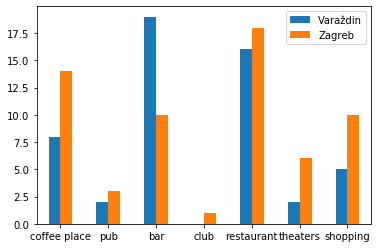

In [31]:
vz = df['Varaždin']
zg = df['Zagreb']
index = ['coffee place', 'pub', 'bar', 'club', 'restaurant', 'theaters', 'shopping']
df = pd.DataFrame({'Varaždin': vz,
                   'Zagreb': zg}, index=index)
ax = df.plot.bar(rot=0)

#### Living
The numerical data regarding costs and quality of living in Varaždin and Zagreb is presented below in a dataframe and bar charts regarding the category:

In [32]:
frames = [df1, df2, df3, df4, df5, df6, df7]
result = pd.concat(frames)
result

,Varaždin,Zagreb
"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child",800.00,1313.45
Apartment (1 bedroom) in City Centre,1918.00,3595.18
Apartment (1 bedroom) Outside of Centre,1673.51,2722.55
Apartment (3 bedrooms) in City Centre,3761.01,6086.62
Apartment (3 bedrooms) Outside of Centre,3041.34,4639.60
Price per Square Meter to Buy Apartment in City Centre,11777.45,3595.18
Price per Square Meter to Buy Apartment Outside of Centre,7024.46,2722.55
"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1324.09,3595.18
1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),0.88,2722.55
"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)",136.00,6086.62


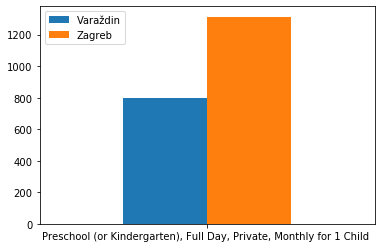

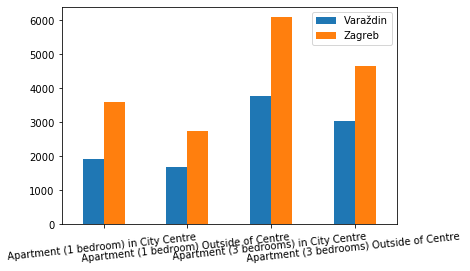

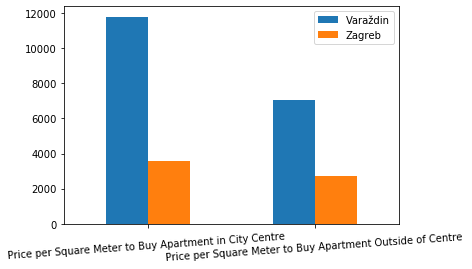

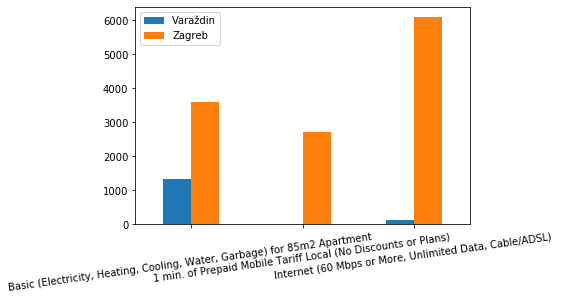

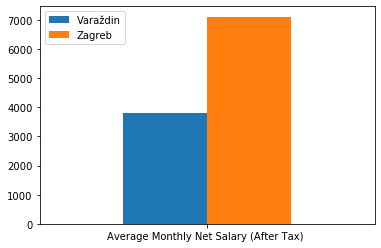

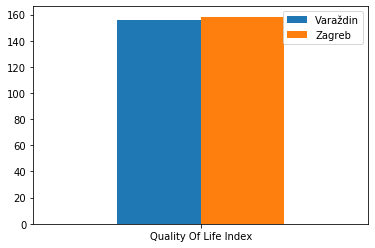

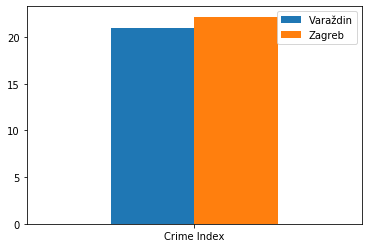

In [33]:
ax = df1.plot.bar(rot=0)
ax = df2.plot.bar(rot=6)
ax = df3.plot.bar(rot=4)
ax = df4.plot.bar(rot=8)
ax = df5.plot.bar(rot=0)
ax = df6.plot.bar(rot=0)
ax = df7.plot.bar(rot=0)

## Discussion

We can see that in general Zagreb has more places to go out for your people. We can also see that it is more expensive then Varaždin in most cases, but on the other hand people do have a higher monthly salary in Zagreb then in Varaždin. Regarding all this, numbeo has the data that for a family of four Varaždin is more expensive. Quality of life index and crime rates are similar, both are slightly higher in Zagreb.

## Conclusion

My conclusion is that we need more data from numbeo for Varaždin to make some assumptions regarding the prices of living. We can agree though that Zagreb would be a more interesting place to live for a younger person, but for a family that maybe wants a quiet place that is not so expensive, we can't make much conclusion with this data.